In [ ]:
# import os
# import pandas as pd

# BASE_DIR = 'data/'
# train_folder = BASE_DIR+'train data/Tea leaf blight'
# # train_annotation = BASE_DIR+'annotated_train_data/'

# files_in_train = sorted(os.listdir(train_folder))
# # files_in_annotated = sorted(os.listdir(train_annotation))

# images=[i for i in files_in_train]

# df = pd.DataFrame()
# df['images']=[train_folder+str(x) for x in images]
# # df['labels']=[train_annotation+str(x) for x in images]

# pd.to_csv('files_path.csv', header=None)

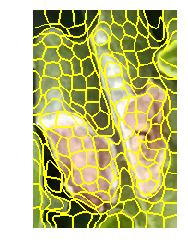

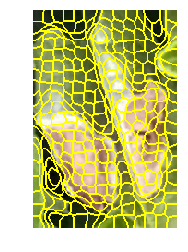

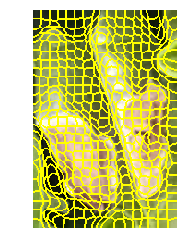

In [99]:
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
import matplotlib.pyplot as plt
import argparse
import random as rng
rng.seed(12345) 
# construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required = True, help = "Path to the image")
# args = vars(ap.parse_args())
 
# load the image and convert it to a floating point data type

image = img_as_float(io.imread("1.jpg")) 
# loop over the number of segments
for numSegments in (200, 300, 500):
	# apply SLIC and extract (approximately) the supplied number
	# of segments
	segments = slic(image, n_segments = numSegments, sigma = 5)
 
	# show the output of SLIC
	fig = plt.figure("Superpixels -- %d segments" % (numSegments))
	ax = fig.add_subplot(1, 1, 1)
	ax.imshow(mark_boundaries(image, segments))
	plt.axis("off")

    for (i, segVal) in enumerate(np.unique(segments)):
        # construct a mask for the segment
        segVal = segVal + rng.randint(0,256)
        mask = np.zeros(image.shape[:2], dtype = "uint8")
        mask[segments == segVal] = 255

        # show the masked region
        cv2.imshow("Mask", mask)
        cv2.imshow("Applied", cv2.bitwise_and(image, image, mask = mask))
        cv2.waitKey(0)    
    
# show the plots
plt.show()
fig.savefig('plot.png')  

In [63]:
from cv2 import cv2
import numpy as np

filename = 'plot.png'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# find Harris corners
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)
ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)

# find centroids
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)

# define the criteria to stop and refine the corners
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)

# Now draw them
res = np.hstack((centroids,corners))
res = np.int0(res)
img[res[:,1],res[:,0]]=[0,0,255]
img[res[:,3],res[:,2]] = [0,255,0]

cv2.imwrite('harris.png',img)

True

In [64]:
# src = cv2.imread("harris.png", 1) # read input image
# gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY) # convert to grayscale
# blur = cv2.blur(gray, (3, 3)) # blur the image
# ret, thresh = cv2.threshold(blur, 50, 255, cv2.THRESH_BINARY)
# contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# hull = []
 
# # calculate points for each contour
# for i in range(len(contours)):
#     # creating convex hull object for each contour
#     hull.append(cv2.convexHull(contours[i], False))

# drawing = np.zeros((thresh.shape[0], thresh.shape[1], 3), np.uint8)
 
# # draw contours and hull points
# for i in range(len(contours)):
#     color_contours = (0, 255, 0) # green - color for contours
#     color = (255, 0, 0) # blue - color for convex hull
#     # draw ith contour
#     cv2.drawContours(drawing, contours, i, color_contours, 1, 8, hierarchy)
#     # draw ith convex hull object
#     cv2.drawContours(drawing, hull, i, color, 1, 8) 
# cv2.imshow('Contours', drawing)     

In [65]:
import random as rng
rng.seed(12345)

def thresh_callback(val):
    threshold = val
    # Detect edges using Canny
    canny_output = cv2.Canny(src_gray, threshold, threshold * 2)
    # Find contours
    contours, _ = cv2.findContours(canny_output, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    # Find the convex hull object for each contour
    hull_list = []
    for i in range(len(contours)):
        hull = cv2.convexHull(contours[i])
        hull_list.append(hull)
    # Draw contours + hull results
    drawing = np.zeros((canny_output.shape[0], canny_output.shape[1], 3), dtype=np.uint8)
    for i in range(len(contours)):
        color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
        cv2.drawContours(drawing, contours, i, color)
        cv2.drawContours(drawing, hull_list, i, color)
    # Show in a window
#     cv2.imshow('Contours', drawing)
    cv2.imwrite('contours.png',drawing)

In [66]:
src = cv2.imread('harris.png',-1)
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
src_gray = cv2.blur(src_gray, (3,3))
# Create Window
source_window = 'Source'
cv2.namedWindow(source_window)
# cv2.imshow(source_window, src)
max_thresh = 255
thresh = 100 # initial threshold
cv2.createTrackbar('Canny thresh:', source_window, thresh, max_thresh, thresh_callback)
thresh_callback(thresh)

# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [67]:
from skimage.feature import greycomatrix,greycoprops
from skimage import feature
import numpy as np
from skimage.io import imread
from skimage import io
from sklearn import preprocessing
mat = []
for i in range(60):
    img = io.imread("contours/"+str(i)+".png", as_grey=True)
    S = preprocessing.MinMaxScaler((0,11)).fit_transform(img).astype(int)
    S[99:105, 99:105]
    io.imsave('preprocessed.png', S)
    img = io.imread('preprocessed.png')
    # clipped = np.clip(img, a_min=0, a_max=2)
    # result = greycomatrix(img, distances = [1], angles = [0], levels = 3, symmetric=True)
    # img = np.uint8(img)
    result = greycomatrix(img, distances=[1], angles=[0], levels=12, symmetric=False, normed=False)
    glcm = result[0:5, 0:5, 0, 0]
    mat.insert(i,glcm.flatten())
# GLCM = greycomatrix(img,'Offset',[0, np.pi/2]);
# stats = greycoprops(GLCM,'all')
# t1= struct2array(stats)

/home/polkampally/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: preprocessed.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/polkampally/anaconda3/lib/python3.6/site-packages/skimage/feature/texture.py:109: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(image.dtype, np.float):


In [68]:
feature.greycoprops(result, 'contrast')

array([[504950]])

In [69]:
train = np.array(mat)

In [70]:
from skimage.feature import greycomatrix,greycoprops
from skimage import feature
import numpy as np
from skimage.io import imread
from skimage import io
from sklearn import preprocessing
test_mat = []
for i in range(60):
    img = io.imread("test_contours/"+str(i)+".png", as_grey=True)
    S = preprocessing.MinMaxScaler((0,11)).fit_transform(img).astype(int)
    S[99:105, 99:105]
    io.imsave('preprocessed.png', S)
    img = io.imread('preprocessed.png')
    # clipped = np.clip(img, a_min=0, a_max=2)
    # result = greycomatrix(img, distances = [1], angles = [0], levels = 3, symmetric=True)
    # img = np.uint8(img)
    result = greycomatrix(img, distances=[1], angles=[0], levels=12, symmetric=False, normed=False)
    glcm = result[0:5, 0:5, 0, 0]
    test_mat.insert(i,glcm.flatten())
# GLCM = greycomatrix(img,'Offset',[0, np.pi/2]);
# stats = greycoprops(GLCM,'all')
# t1= struct2array(stats)

/home/polkampally/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: preprocessed.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/polkampally/anaconda3/lib/python3.6/site-packages/skimage/feature/texture.py:109: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(image.dtype, np.float):


In [71]:
test_mat
test = np.array(test_mat)

In [72]:
import pandas as pd
dataset_train = pd.read_csv("datafiles_path.csv")

In [73]:
dataset_test = pd.read_csv("datatest_files_path.csv")

In [74]:
# shape = (60,1)
x_train= train
# x_train.shape
# x_train.reshape(shape)
y_train = dataset_train['labels']

In [75]:
x_test = test
y_test = dataset_test['labels']

In [76]:
dataset_train

,0,images,labels
0,1,//home/polkampally/dwdm/data/train data/Tea re...,2
1,2,//home/polkampally/dwdm/data/train data/Tea re...,2
2,3,//home/polkampally/dwdm/data/train data/Tea re...,2
3,4,//home/polkampally/dwdm/data/train data/Tea re...,2
4,5,//home/polkampally/dwdm/data/train data/Tea re...,2
5,6,//home/polkampally/dwdm/data/train data/Tea re...,2
6,7,//home/polkampally/dwdm/data/train data/Tea re...,2
7,8,//home/polkampally/dwdm/data/train data/Tea re...,2
8,9,//home/polkampally/dwdm/data/train data/Tea re...,2
9,10,//home/polkampally/dwdm/data/train data/Tea re...,2


In [77]:
# d2_train_dataset = dataset_train.reshape((nsamples,nx*ny))
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(x_train, y_train) 

In [78]:
svm_predictions_x = svm_model_linear.predict(x_test)

In [79]:
accuracy = svm_model_linear.score(x_test, y_test)

In [80]:
accuracy

0.4166666666666667

In [81]:
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, svm_predictions)     
# test_y , yhat_classes

In [82]:
cm

array([[ 9,  6,  5],
       [ 7, 11,  2],
       [ 7,  8,  5]])

In [83]:
svm_predictions

array([2, 2, 1, 1, 1, 0, 0, 1, 0, 2, 1, 0, 1, 0, 2, 1, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 2, 1, 1, 0, 1, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 2, 0, 1, 2, 0, 2, 2, 1, 2, 0, 0, 1, 0, 1])

In [84]:
accuracy_score(y_test, svm_predictions) 

0.4166666666666667

In [94]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
prec = precision_score(y_test, svm_predictions, pos_label='positive', average='weighted')
print(prec)
rec = recall_score(y_test, svm_predictions, pos_label='positive', average='weighted')
print(rec)
f1 = f1_score(y_test, svm_predictions, pos_label='positive', average='weighted')
print(f1)

0.41599033816425124
0.4166666666666667
0.40666451335055986


/home/polkampally/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1045: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [89]:
import cv2
image = cv2.imread("1.jpg")
saliency = cv2.saliency.StaticSaliencySpectralResidual_create()
(success, saliencyMap) = saliency.computeSaliency(image)
saliencyMap = (saliencyMap * 255).astype("uint8")
cv2.imshow("Image", image)
cv2.imshow("Output", saliencyMap)
cv2.waitKey(0)

AttributeError: module 'cv2.cv2' has no attribute 'saliency'